<a href="https://colab.research.google.com/github/OriRoth22/AIbook/blob/master/ImageProcessingEx_05_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing Assignment 5: Fast Fourier Transform

Before we start, please put your names and IDs in following format

: Firstname LASTNAME, #00000000   //   (e.g.) Dana LEVI, #12345678

**Your Answer:**   
Xxxxx XXXXX, #nnnnnn

In this exercise, you will implement the **fft_clean**  algorithm.

Method: as explained in class.

Notes:
*   Write your code in the dedicated areas (TODO blocks). You can add helper functions.
*   Submission email should include a link to the Colab submission notebook located on your Google Drive with Commenter access right to nev1958a@gmail.com
*   The solution notebook should be able to be run (‘Run all’) with no errors.
In case of errors, the submission will be disqualified.
*   The grade will depend on correct performance on several grayscale images and on clean programming and documentation.
*   Do not forget to add the Names and Student I.D. at the top of the notebook.
*   All images are given as 2-dimensional matrices of type `float`, with values in the range [0..1].
*   Pay Attention! In the following function, the returned images must be the same size as the original Images!

Please implement the following function:
1. Write the `fft_clean` function which receive 4 images (fft1-4), cleans them and returns the 4 clean images using fft.

## Setup Code
Before getting started, we need to run some boilerplate code to set up our environment. You will need to rerun this setup code each time you start the notebook.

In [1]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import PIL
from scipy.signal import convolve


In [12]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift


In [2]:
GITHUB_PATH = 'https://raw.githubusercontent.com/dnevo/ImageProcessing/main/images/'

In [3]:
def read_file(file_name:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        file_name: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, file_name)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [4]:
def plot_images(img1:np.array, img2:np.array):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    axes[0].imshow(img1, cmap='gray')
    axes[1].imshow(img2, cmap='gray')

## `fft_clean`

In [56]:
def fft_clean(img1: np.array, img2: np.array, img3: np.array, img4: np.array) \
    -> (np.array, np.array, np.array, np.array):
    '''
    This function receives 4 grayscale images and clean them using FFT algorithm.

    Args:
        img1:   image array in float format (range: 0..1) - the source grayscale
                image.
        img2:   image array in float format (range: 0..1) - the source grayscale
                image.
        img3:   image array in float format (range: 0..1) - the source grayscale
                image.
        img4:   image array in float format (range: 0..1) - the source grayscale
                image.

    Returns:
        img_c1:    array in int format (values: 0, 1) - the cleaned image.
        img_c2:    array in int format (values: 0, 1) - the cleaned image.
        img_c3:    array in int format (values: 0, 1) - the cleaned image.
        img_c4:    array in int format (values: 0, 1) - the cleaned image.
    '''
    f1 = fft2(img1)
    f1 = fftshift(f1)
    f1[266-10,220] = 0
    f1[266+10,220] = 0
    img_c1 = ifft2(ifftshift(f1)).real

    f1 = fft2(img2)
    f1 = fftshift(f1)
    f1[240-15,165-8] = 0
    f1[240+15,165+8] = 0
    img_c2 = ifft2(ifftshift(f1)).real

    f1 = fft2(img3)
    f1 = fftshift(f1)
    f1[189-12,124-7] = 0
    f1[189-12,124+7] = 0
    f1[189+12,124-7] = 0
    f1[189+12,124+7] = 0
    f1[189-12,124] = 0
    f1[189+12,124] = 0
    f1[189,124-7] = 0
    f1[189,124+7] = 0
    img_c3 = ifft2(ifftshift(f1)).real

    f1 = fft2(img4)
    f1 = fftshift(f1)
    f1[299-13,251] = 0
    f1[299+13,251] = 0
    f1[299,251-11] = 0
    f1[299,251+11] = 0
    img_c4 = ifft2(ifftshift(f1)).real




    return img_c1.real, img_c2.real, img_c3.real, img_c4.real

In [6]:
img1 = read_file(file_name='fft1.tiff') / 255
img2 = read_file(file_name='fft2.tiff') / 255
img3 = read_file(file_name='fft3.tiff') / 255
img4 = read_file(file_name='fft4.tiff') / 255


In [62]:
f1 = fft2(img3)
fig = px.imshow(np.log(np.abs(fftshift(f1))**2), color_continuous_scale='gray')
fig.update_layout(coloraxis_showscale=False)

In [57]:
img_c1, img_c2, img_c3, img_c4 = fft_clean(img1, img2, img3, img4)

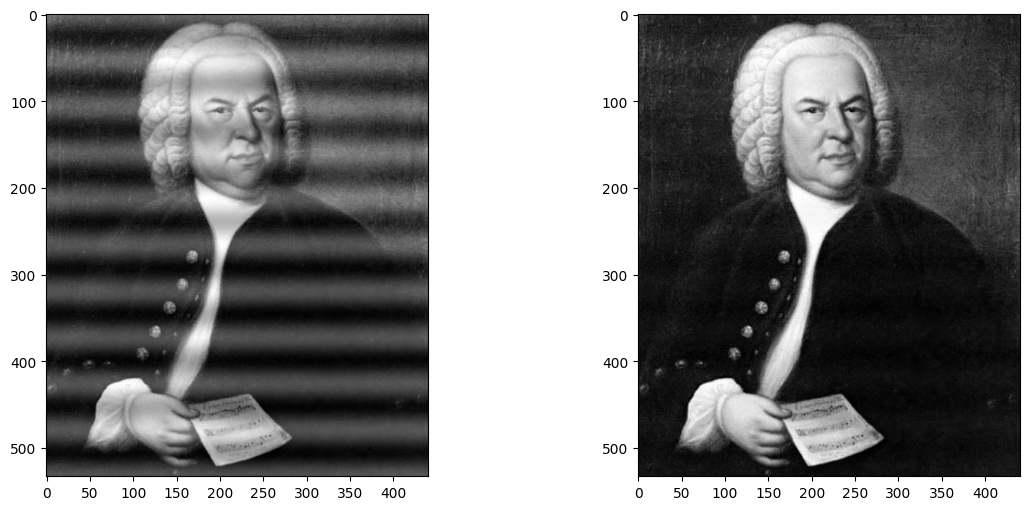

In [58]:
plot_images(img1, img_c1)

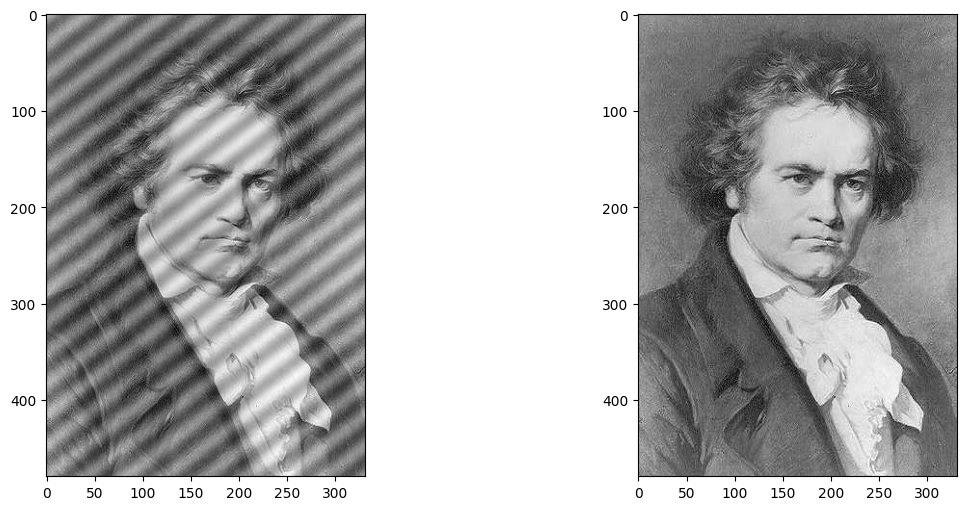

In [59]:
plot_images(img2, img_c2)

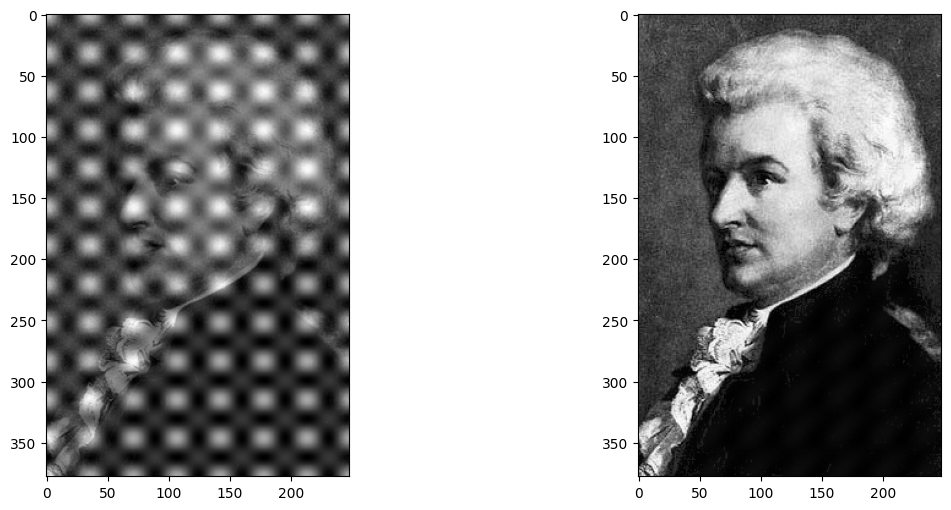

In [61]:
plot_images(img3, img_c3)

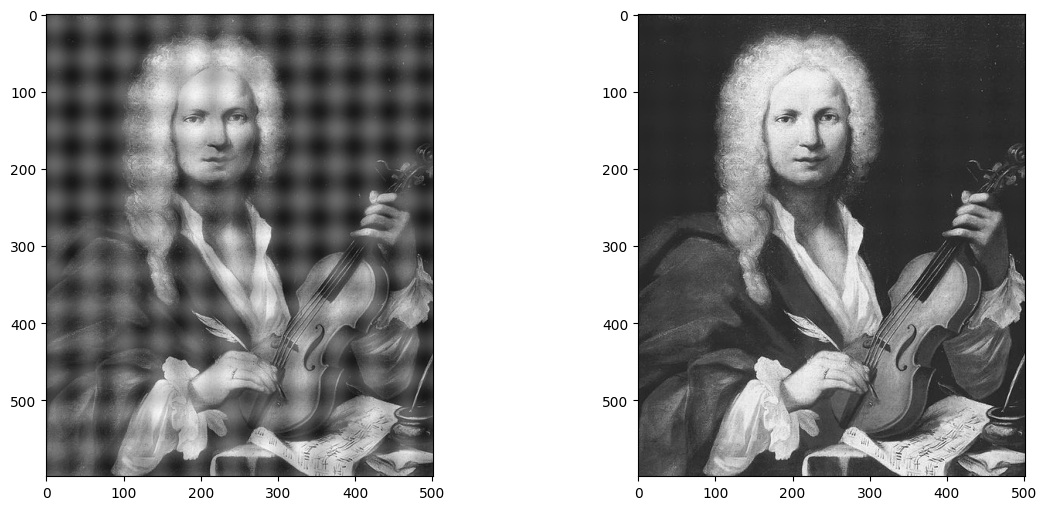

In [60]:
plot_images(img4, img_c4)